# Introduction to Machine Learning tools and methods

## What is it all about?

![ML is...](images/ml_is.jpg)

![ML Timeline](images/ml_timeline.png)

![Types of ML](images/types_of_ml.jpg)

## Toolset

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
plt.xkcd()
plt.rcParams['figure.figsize'] = (16, 10)

%matplotlib inline

### Data Exploration and Processing
* http://pandas.pydata.org/
* http://www.numpy.org/
* https://www.scipy.org/
* http://www.nltk.org/

### Visualization
* http://jupyter.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/

### Learning
* http://scikit-learn.org/stable/
* https://github.com/dmlc/xgboost
* https://github.com/JohnLangford/vowpal_wabbit/wiki
* https://github.com/tensorflow/tensorflow/

### Deep Learning
* http://caffe.berkeleyvision.org/
* http://deeplearning.net/software/theano/

### Ruby!
* https://github.com/arbox/machine-learning-with-ruby
* https://github.com/arbox/nlp-with-ruby
* https://github.com/arbox/data-science-with-ruby
* Jupyter works good with https://github.com/SciRuby/iruby

# Classification Problems. Binary Classification. Trees

![Titanic](images/Titanic Sinking.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Data Exploration

In [27]:
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')

In [28]:
type(train_df)

pandas.core.frame.DataFrame

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
train_df.shape

(891, 12)

In [32]:
train_df.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Preparation

In [42]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
train_df.Age.fillna(train_df.Age.median(), inplace=True)
test_df.Age.fillna(train_df.Age.median(), inplace=True)

train_df.Embarked.fillna('S', inplace=True)
test_df.Embarked.fillna('S', inplace=True)

train_df.Fare.fillna(train_df.Fare.median(), inplace=True)
test_df.Fare.fillna(train_df.Fare.median(), inplace=True)

In [45]:
train_df = pd.concat([train_df, 
                      pd.get_dummies(train_df['Pclass'], prefix='PClass'),
                      pd.get_dummies(train_df['Sex'], prefix='Sex'),
                      pd.get_dummies(train_df['SibSp'], prefix='SibSp'),
                      pd.get_dummies(train_df['Parch'], prefix='Parch'),
                      pd.get_dummies(train_df['Embarked'], prefix='Embarked')],
                      axis=1)
test_df = pd.concat([test_df, 
                     pd.get_dummies(test_df['Pclass'], prefix='PClass'),
                     pd.get_dummies(test_df['Sex'], prefix='Sex'),
                     pd.get_dummies(test_df['SibSp'], prefix='SibSp'),
                     pd.get_dummies(test_df['Parch'], prefix='Parch'),
                     pd.get_dummies(test_df['Embarked'], prefix='Embarked')],
                     axis=1)

In [49]:
y_train = train_df.Survived

In [50]:
train_df.drop(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 
               'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 
              'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1, inplace=True)

In [52]:
train_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [53]:
test_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [54]:
set(test_df.columns) - set(train_df.columns)

{'Parch_9'}

In [55]:
test_df.drop(['Parch_9'], axis=1, inplace=True)

In [59]:
X_train = train_df
X_test = test_df

## Fit a Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

In [94]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [95]:
y_train_predicted = tree.predict(X_train)
y_train_predicted

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1,

In [96]:
accuracy_score(y_train, y_train_predicted)

0.8271604938271605

There are probabilities as well!

In [97]:
tree.predict_proba(X_train)

array([[ 0.8975    ,  0.1025    ],
       [ 0.02      ,  0.98      ],
       [ 0.41025641,  0.58974359],
       ..., 
       [ 0.88888889,  0.11111111],
       [ 0.67721519,  0.32278481],
       [ 0.8975    ,  0.1025    ]])

## How it works?

In [98]:
export_graphviz(tree, out_file='images/tree.dot', feature_names=X_train.columns)  

In [99]:
!dot -Tpng 'images/tree.dot' -o 'images/tree.png'

![Titanic Decision Tree](images/tree.png?12344444222)

While building the tree, we want to build an algorithm to divide our samples into two groups: those who has survived and who hasn't. 

We seek to split the data by any single attribute (feature, column) in the most effective way, step by step, until any of the stopping criteria will be met (depends on initial parameters of the tree).

You can define "effectiveness" of the split in many ways, but usually it is done via maximizing the Information Gain of each step, or, in other words, by measuring the entropy of resulting splits. When set of the data has the same proportion of each class, the entropy is 1, when it consists of samples of a single class, the entropy is 0. 

When you predict probabilities, they are calculated as share of given class in the final leaf.

In [142]:
def show_feature_importances(features, importances):
    return pd.DataFrame({ 'feature': features,
                          'importance': importances }).sort_values('importance', ascending=False)

show_feature_importances(X_train.columns, tree.feature_importances_)

,feature,importance
6,Sex_male,0.572840
4,PClass_3,0.188563
1,Fare,0.143402
0,Age,0.095194
14,Parch_0,0.000000
22,Embarked_Q,0.000000
21,Embarked_C,0.000000
20,Parch_6,0.000000
19,Parch_5,0.000000
18,Parch_4,0.000000


## Overfitting

In [130]:
overfit_tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
overfit_tree.fit(X_train, y_train)
accuracy_score(y_train, overfit_tree.predict(X_train))

0.97979797979797978

In [135]:
overfit_tree.tree_.max_depth

22

In [143]:
show_feature_importances(X_train.columns, overfit_tree.feature_importances_)

,feature,importance
0,Age,0.293938
1,Fare,0.288217
6,Sex_male,0.239194
4,PClass_3,0.082393
7,SibSp_0,0.019582
21,Embarked_C,0.012380
8,SibSp_1,0.012169
16,Parch_2,0.011617
15,Parch_1,0.009382
14,Parch_0,0.008437


In [152]:
from sklearn.model_selection import cross_val_score

In [156]:
overfit_cv_score = cross_val_score(overfit_tree, X_train, y_train, cv=5)
overfit_cv_score

array([ 0.74860335,  0.7877095 ,  0.76404494,  0.76966292,  0.77966102])

In [157]:
overfit_cv_score.mean()

0.76993634625594065

## Hyperparameter Optimization

In [150]:
from sklearn.model_selection import GridSearchCV

Best parameters are selected using [Cross-Validation](https://en.wikipedia.org/wiki/Cross-validation) and [Grid Search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) methods.

![K-Fold Cross-Validation](images/K-fold_cross_validation_EN.jpg)

In [112]:
?DecisionTreeClassifier

In [113]:
%%time
tree_params = { 'max_depth': list(range(1, 30)),
                'min_samples_leaf': list(range(1, 20)) }

cv_tree = GridSearchCV(DecisionTreeClassifier(random_state=10),
                       tree_params, cv=6, n_jobs=1)

cv_tree.fit(X_train, y)

CPU times: user 15.2 s, sys: 59.4 ms, total: 15.2 s
Wall time: 15.3 s


In [163]:
cv_tree.best_params_, cv_tree.best_score_

({'max_depth': 6, 'min_samples_leaf': 1}, 0.82603815937149272)

In [119]:
y_train_tuned_predicted = cv_tree.predict(X_train)
y_train_tuned_predicted_proba = cv_tree.predict_proba(X_train)

In [120]:
accuracy_score(y_train, y_train_tuned_predicted)

0.86083052749719413

## Ensembles. Random Forest

![Random Forest Simplified](images/random_forest_simplified.png)

Random Forest algorithm builds an arbitrary number of Decision Trees and trains each of the trees on a random subsample of initial data using a random subset of features. 

During prediction, each tree votes independently for a class. Majority class gets into the final prediction.

In contrast to the original publication, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [148]:
y_forest_predicted = forest.predict(X_train)

In [158]:
accuracy_score(y_train, y_forest_predicted)

0.95735129068462399

In [160]:
cross_val_score(forest, X_train, y_train)

array([ 0.75757576,  0.8013468 ,  0.77441077])

In [169]:
from sklearn.model_selection import RandomizedSearchCV

![Grid Search vs Random Search](images/grid_search.jpeg)

In [173]:
%%time
forest_params = { 'max_depth': list(range(1, 7)),
                  'min_samples_leaf': list(range(1, 6)),
                  'n_estimators': list(range(1, 24)) }


locally_best_forest = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                                         forest_params, cv=5, n_jobs=-1)

locally_best_forest.fit(train_df, y)

CPU times: user 143 ms, sys: 54.2 ms, total: 197 ms
Wall time: 2.26 s


In [174]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 11},
 0.8204264870931538)

## Pros and Cons of tree-based models

### Decision Tree
Pros:
* Highly interpretable by a human. 
* Easy visualization. 
* No problems with feature scaling and outliers.
* Relatively fast training.

Cons:
* Overfits easily.
* Optimal solution is not guaranteed.
* Hard to deal with missing values.
* Unstable learning: slightly different input data can ouput an entirely different tree.
* Not a good choice for high-dimensional data (100k+ features, text data, bag of words etc.).

### Random Forest
* Generally doesn't require tuning.
* Generally doesn't overfit (more trees -> more accuracy).
* Performs worse than [boosting](http://xgboost.readthedocs.io/en/latest/model.html) methods.

You can find more in [this blog post](http://blog.yhat.com/posts/random-forests-in-python.html) and in [this video](https://www.youtube.com/watch?v=o7iDkcpOr_g).

*Worth mentioning that tree-based algorithms can be used to solve regression problems too.*

# Regression Problems. Linear Regression

The [dataset](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) below contains 25,000 records of human heights and weights. These data were obtained in 1993 by a Growth Survey of 25,000 children from birth to 18 years of age recruited from Maternal and Child Health Centres (MCHC) and schools and were used to develop Hong Kong's current growth charts for weight, height, weight-for-age, weight-for-height and body mass index (BMI). 

In [176]:
df = pd.read_csv('data/weights_heights.csv')

In [177]:
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


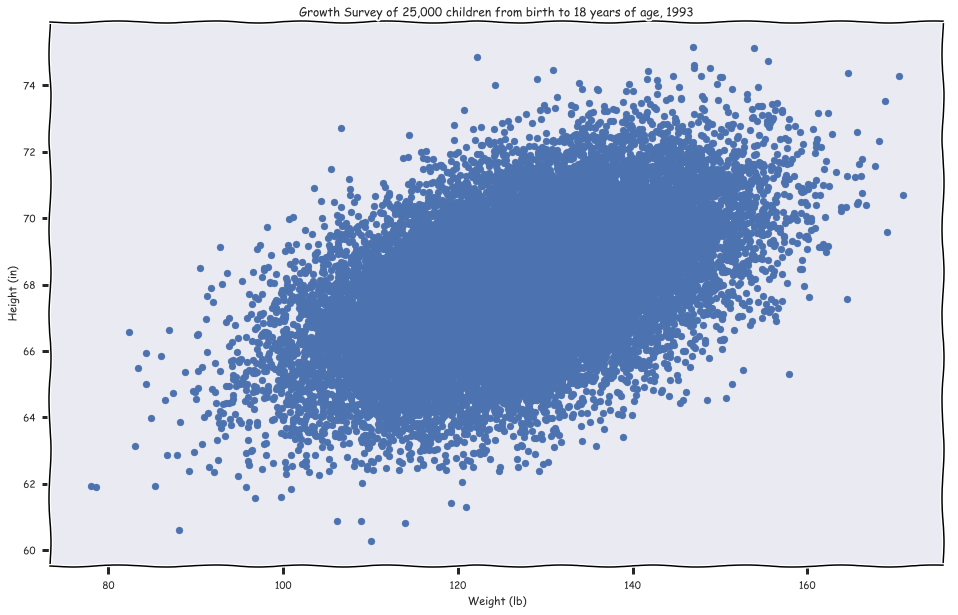

In [178]:
plt.figure(figsize=(16, 10))
plt.title('Growth Survey of 25,000 children from birth to 18 years of age, 1993')
plt.xlabel('Weight (lb)')
plt.ylabel('Height (in)')
plt.scatter(df.Weight, df.Height);

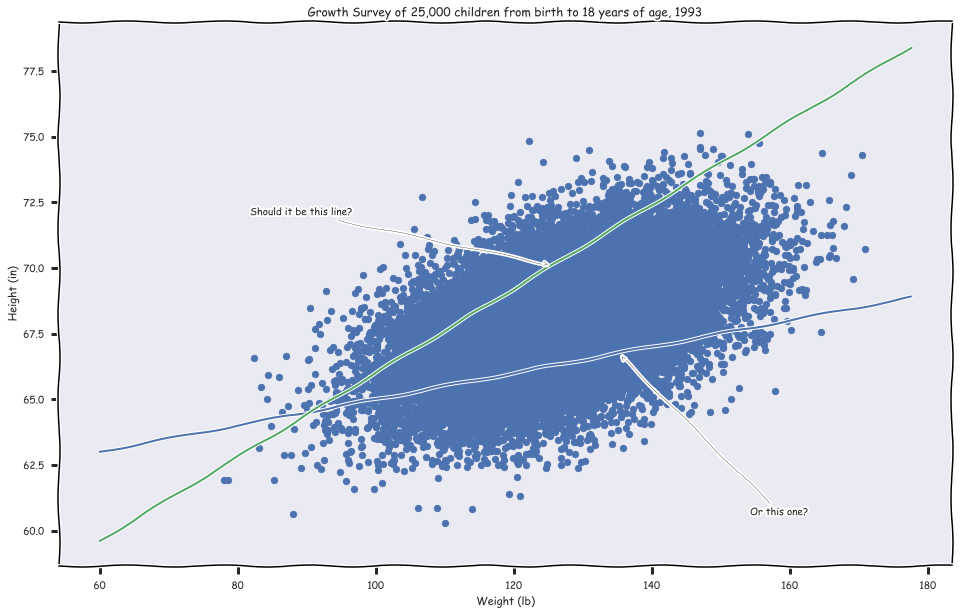

In [212]:
plt.figure(figsize=(16, 10))
plt.title('Growth Survey of 25,000 children from birth to 18 years of age, 1993')
plt.xlabel('Weight (lb)')
plt.ylabel('Height (in)')
plt.scatter(df.Weight, df.Height);

X_linspace = np.linspace(60, 180, endpoint=False)
y_1 = 60 + 0.05 * X_linspace
y_2 = 50 + 0.16 * X_linspace
plt.plot(X_linspace, y_1)
plt.plot(X_linspace, y_2)

plt.annotate('Should it be this line?', 
             xy=(550, 350), xycoords='figure pixels', arrowprops=dict(arrowstyle='->'), xytext=(250, 400))
plt.annotate('Or this one?', 
             xy=(620, 260), xycoords='figure pixels', arrowprops=dict(arrowstyle='->'), xytext=(750, 100));

In [180]:
linreg = LinearRegression()
linreg.fit(df[['Weight']], df.Height)

/Users/nshebanov/.pyenv/versions/3.6.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
linreg.coef_, linreg.intercept_

(array([ 0.08200701]), 57.571709913082692)

In [216]:
def inch_to_cm(inch):
    return inch / 0.393701

def kg_to_lb(kg):
    return kg * 2.20462

In [219]:
my_height, = linreg.predict([[kg_to_lb(75)]])
inch_to_cm(my_height)

180.67335976182491

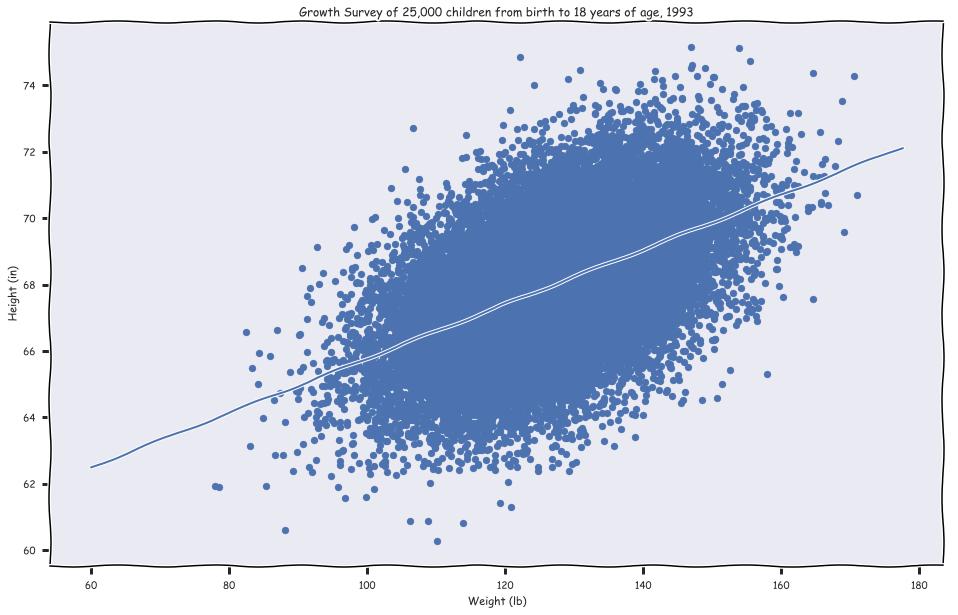

In [190]:
plt.figure(figsize=(16, 10))
plt.title('Growth Survey of 25,000 children from birth to 18 years of age, 1993')
plt.xlabel('Weight (lb)')
plt.ylabel('Height (in)')
plt.scatter(df.Weight, df.Height);

X_linspace = np.linspace(60, 180, endpoint=False)
y_1 = linreg.intercept_ + linreg.coef_[0] * X_linspace
plt.plot(X_linspace, y_1);

## Higher-degree polynoms

![Higher-degree polynomial functions](images/overfitting_regression.png)

If we want to make regression more flexible, there seems to be a clear solution: We can replace linear function that defines a hyperplane with a more complicated function that has more parameters and thus can be better fit to the data. In two dimensions, for example, we could replace the line y = cx + b with the parabola y = d x^2 + c x + b. We now have three parameter (d, c and b) and the resulting graph will be allowed to curve up or down, as in the middle picture below. [(read more)](https://shapeofdata.wordpress.com/2013/03/26/general-regression-and-over-fitting/)

**There is always a right tool for the job.**

*Linear models are good at classification problems as well. It is called [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression).*

![Logit](images/logit.png)

## Pros and cons of Generalized Linear Models

Pros:
* Fast. Simple. Interpretable.
* Works well with high-dimensional data (millions of features).
* Used in on-line learning (not MOOCs, but learning on big data on the fly).

Cons:
* Very basic. Bad at approximating non-linear functions. 
* Requires scaling of the features.
* Sensitive to outliers.
* Sensitive to correlated features.
* Theoretically, your data must satisfy some tests and assumptions. In practice it is usually omitted.

# Clustering. KMeans.

![Mouse](images/ClusterAnalysis_Mouse.svg.png)

![Different Algorithms](images/sphx_glr_plot_cluster_comparison_0011.png)

## Digits clustering. Dimensionality Reduction.

In [234]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.manifold import TSNE

In [235]:
digits = load_digits()
X, y = digits.data, digits.target

In [236]:
X.shape

(1797, 64)

In [237]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [239]:
tsne = TSNE(random_state=17)
X_tsne_reduced = tsne.fit_transform(X_scaled)

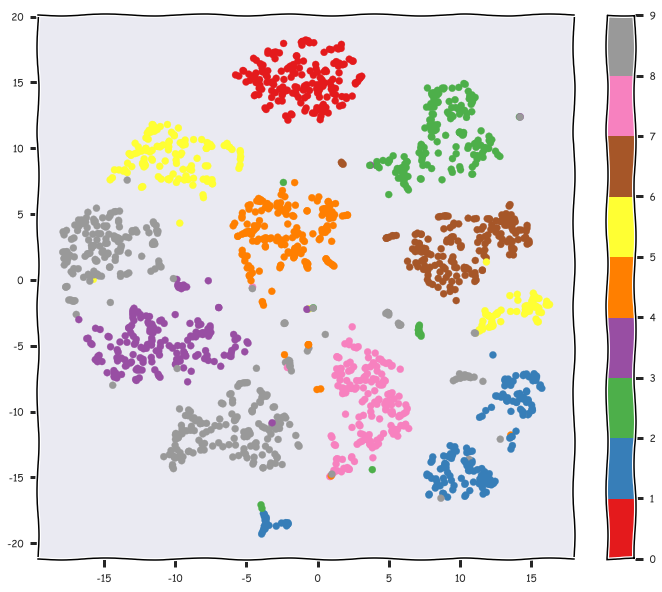

In [240]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c=y, cmap='Set1')
plt.colorbar();

In [241]:
kmeans = KMeans(random_state=17, n_clusters=10, max_iter=50)
predictions = kmeans.fit_predict(X_scaled)

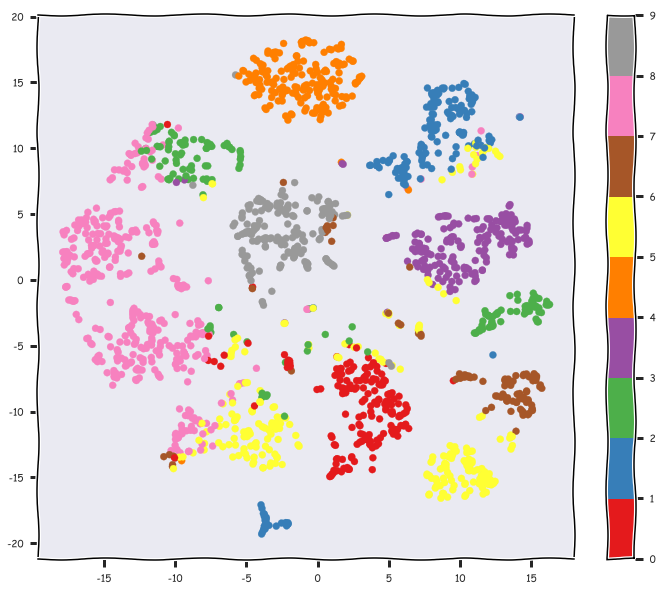

In [242]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c=predictions, cmap='Set1')
plt.colorbar();

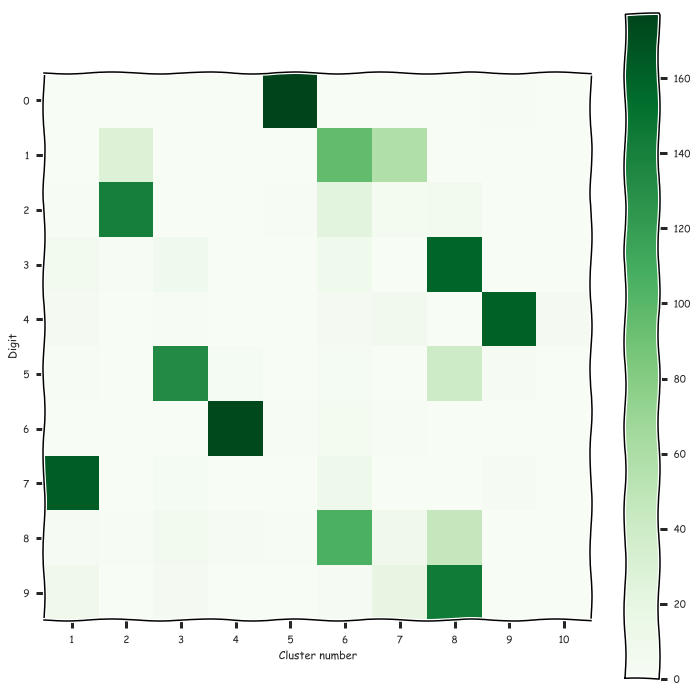

In [243]:
M = metrics.confusion_matrix(y, predictions)

plt.figure(figsize=(10,10))
im = plt.imshow(M, interpolation='nearest', cmap='Greens')
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks , [str(i + 1) for i in range(10)])
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.tight_layout()
plt.ylabel('Digit')
plt.xlabel('Cluster number')
plt.colorbar()
plt.show()

## Text clustering

In [231]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

In [221]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


In [ ]:
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

In [230]:
print(dataset['data'][0])

From: healta@saturn.wwc.edu (Tammy R Healy)
Subject: Re: who are we to judge, Bobby?
Lines: 38
Organization: Walla Walla College
Lines: 38

In article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:
>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )
>Subject: Re: who are we to judge, Bobby?
>Date: Wed, 14 Apr 1993 21:33:56 GMT
>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:
>>Bobby,
>>
>>I would like to take the liberty to quote from a Christian writer named 
>>Ellen G. White.  I hope that what she said will help you to edit your 
>>remarks in this group in the future.
>>
>>"Do not set yourself as a standard.  Do not make your opinions, your views 
>>of duty, your interpretations of scripture, a criterion for others and in 
>>your heart condemn them if they do not come up to your ideal."
>>                         Thoughts Fromthe Mount of Blessing p. 124
>>
>>I hope quoting this doesn't make the a

In [222]:
%%time
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english',
                             use_idf=True)

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


In [224]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
Homogeneity: 0.531
Completeness: 0.586
V-measure: 0.557
Adjusted Rand-Index: 0.538
Silhouette Coefficient: 0.018


In [225]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: space nasa access henry digex gov pat toronto alaska com
Cluster 2: god com people don article say think just jesus know
Cluster 3: sandvik sgi kent livesey com apple newton solntze wpd jon
Cluster 4: graphics com university thanks image posting host nntp ac computer
